In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
df = pd.read_csv(r"/kaggle/input/digit-recognizer/train.csv")

In [3]:
df.sample(2)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
23951,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1677,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(42000, 785)

In [5]:
df.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [6]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [7]:
y

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [8]:
import numpy as np

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA

from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import r2_score,accuracy_score, mean_squared_error


In [9]:
scale = StandardScaler()

In [10]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = .3 , random_state = 42)

In [11]:
X_test = scale.fit_transform(X_test)
X_train = scale.fit_transform(X_train)

In [12]:
clf1 = LinearRegression()
clf2 = LogisticRegression()
clf3=KNeighborsClassifier()

clf1.fit(X_train,y_train)
clf2.fit(X_train,y_train)
clf3.fit(X_train,y_train)

y_pred1 = clf1.predict(X_test)
y_pred2 = clf2.predict(X_test)
y_pred3 = clf3.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
# For Linear Regression (clf1), use regression metrics
mse1 = mean_squared_error(y_test, y_pred1)
r2_1 = r2_score(y_test, y_pred1)

# For Logistic Regression (clf2) and KNN (clf3), use accuracy
accuracy2 = accuracy_score(y_test, y_pred2)
accuracy3 = accuracy_score(y_test, y_pred3)

# Print results
print(f"Linear Regression MSE: {mse1}")
print(f"Linear Regression R^2: {r2_1}")
print(f"Logistic Regression Accuracy: {accuracy2}")
print(f"KNN Accuracy: {accuracy3}")

Linear Regression MSE: 1.9222592689244084e+23
Linear Regression R^2: -2.3274939459659975e+22
Logistic Regression Accuracy: 0.9063492063492063
KNN Accuracy: 0.9372222222222222


PCA

In [14]:
pca = PCA(n_components=None)

X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.fit_transform(X_test)

In [15]:
pca.explained_variance_

array([4.03181486e+01, 2.88570185e+01, 2.71360674e+01, 2.06343123e+01,
       1.79102992e+01, 1.56775493e+01, 1.37370190e+01, 1.29441968e+01,
       1.10934381e+01, 1.00972524e+01, 9.77405229e+00, 8.77680664e+00,
       8.03273616e+00, 7.93806592e+00, 7.52397365e+00, 7.18954916e+00,
       6.83683628e+00, 6.77562532e+00, 6.45594566e+00, 6.31811909e+00,
       6.12322102e+00, 5.71640228e+00, 5.53907537e+00, 5.38075222e+00,
       5.17778050e+00, 5.07332210e+00, 4.91566770e+00, 4.73896501e+00,
       4.53699969e+00, 4.47874435e+00, 4.41083541e+00, 4.29961685e+00,
       4.21940924e+00, 4.13015910e+00, 4.08877378e+00, 3.99080943e+00,
       3.91653741e+00, 3.83407271e+00, 3.76779820e+00, 3.67977759e+00,
       3.56368692e+00, 3.49192281e+00, 3.37680457e+00, 3.33256185e+00,
       3.31118532e+00, 3.28439083e+00, 3.23659971e+00, 3.13515334e+00,
       3.10670949e+00, 3.06700288e+00, 2.97947446e+00, 2.93845360e+00,
       2.84898306e+00, 2.81976043e+00, 2.80886230e+00, 2.78093734e+00,
      

In [16]:
pca.explained_variance_ratio_

array([5.88539398e-02, 4.21236909e-02, 3.96115529e-02, 3.01206929e-02,
       2.61443471e-02, 2.28851168e-02, 2.00524508e-02, 1.88951380e-02,
       1.61935148e-02, 1.47393446e-02, 1.42675570e-02, 1.28118395e-02,
       1.17256915e-02, 1.15874977e-02, 1.09830314e-02, 1.04948592e-02,
       9.97999077e-03, 9.89063880e-03, 9.42399020e-03, 9.22279950e-03,
       8.93829935e-03, 8.34445051e-03, 8.08559966e-03, 7.85448931e-03,
       7.55820374e-03, 7.40572183e-03, 7.17558769e-03, 6.91764803e-03,
       6.62283154e-03, 6.53779401e-03, 6.43866473e-03, 6.27631475e-03,
       6.15923266e-03, 6.02895082e-03, 5.96853909e-03, 5.82553678e-03,
       5.71711909e-03, 5.59674222e-03, 5.49999879e-03, 5.37151175e-03,
       5.20204976e-03, 5.09729295e-03, 4.92925047e-03, 4.86466768e-03,
       4.83346354e-03, 4.79435061e-03, 4.72458808e-03, 4.57650295e-03,
       4.53498237e-03, 4.47702111e-03, 4.34925254e-03, 4.28937284e-03,
       4.15876927e-03, 4.11611188e-03, 4.10020346e-03, 4.05944034e-03,
      

In [17]:
pca.components_.shape

(784, 784)

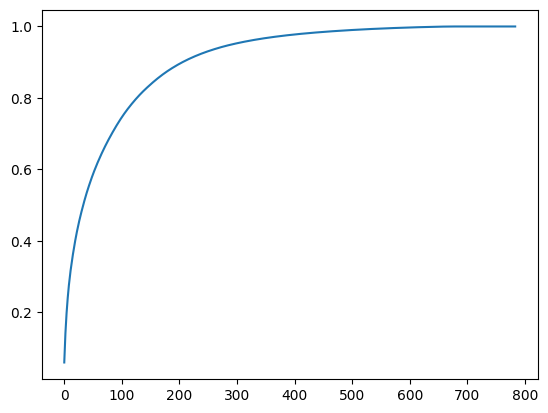

In [18]:
import matplotlib.pyplot as plt
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [19]:
pca = PCA(n_components=212)

X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.fit_transform(X_test)

In [20]:
clf1 = LinearRegression()
clf2 = LogisticRegression()
clf3=KNeighborsClassifier()

clf1.fit(X_train_trf,y_train)
clf2.fit(X_train_trf,y_train)
clf3.fit(X_train_trf,y_train)

y_pred1 = clf1.predict(X_test_trf)
y_pred2 = clf2.predict(X_test_trf)
y_pred3 = clf3.predict(X_test_trf)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
# For Linear Regression (clf1), use regression metrics
mse1 = mean_squared_error(y_test, y_pred1)
r2_1 = r2_score(y_test, y_pred1)

# For Logistic Regression (clf2) and KNN (clf3), use accuracy
accuracy2 = accuracy_score(y_test, y_pred2)
accuracy3 = accuracy_score(y_test, y_pred3)

# Print results
print(f"Linear Regression MSE: {mse1}")
print(f"Linear Regression R^2: {r2_1}")
print(f"Logistic Regression Accuracy: {accuracy2}")
print(f"KNN Accuracy: {accuracy3}")

Linear Regression MSE: 6.525813013796846
Linear Regression R^2: 0.2098469479292927
Logistic Regression Accuracy: 0.4064285714285714
KNN Accuracy: 0.5223015873015873
